# Import Library:

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Data:

In [4]:
df_movieid = pd.read_csv('MovieFranchises.csv', nrows = 60)
df_movieid.tail()

,index,MovieID,Title,Lifetime Gross,Year,Studio,Rating,Runtime,Budget,ReleaseDate,VoteAvg,VoteCount,FranchiseID
55,55,1056,Eternals,402064899,2021,Marvel Studios,PG-13,155.0,200000000.0,11-05-21,2.96,741.0,105.0
56,56,1057,Spider-Man: No Way Home,1915877753,2021,Marvel Studios,PG-13,148.0,200000000.0,12-17-21,3.85,2990.0,105.0
57,57,1058,Doctor Strange in the Multiverse of Madness,955775804,2022,Marvel Studios,PG-13,126.0,200000000.0,05-06-22,3.26,761.0,105.0
58,58,1059,Jurassic World Dominion,997782460,2022,Universal Pictures,PG-13,147.0,165000000.0,06-10-22,2.64,238.0,102.0
59,59,1060,Thor: Love and Thunder,758661016,2022,Marvel Studios,PG-13,119.0,250000000.0,07-08-22,3.15,397.0,105.0


# Seperate Data:

In [10]:
df_castid = pd.read_csv('MovieFranchises.csv', skiprows = range (0,60), nrows=290, header = 1)
df_castid = df_castid.drop(columns=[col for col in df_castid.columns if 'Unnamed' in col])
df_castid = df_castid.rename(columns={'60':'index'})
df_castid.head()

,index,MovieCastID,MovieID,ActorName
0,61,1001,1001,Mark Hamill
1,62,1002,1001,Harrison Ford
2,63,1003,1001,Carrie Fisher
3,64,1004,1001,Peter Cushing
4,65,1005,1001,Alec Guinness


In [12]:
df_directorid = pd.read_csv('MovieFranchises.csv', skiprows = range (0,351), nrows=65, header = 1)
df_directorid = df_directorid.drop(columns=[col for col in df_directorid.columns if 'Unnamed' in col])
df_directorid = df_directorid.rename(columns={'351':'index'})
df_directorid.head()

,index,MovieDirectorID,DirectorName,MovieID
0,352,101,George Lucas,1001
1,353,102,Irvin Kershner,1002
2,354,103,Richard Marquand,1003
3,355,104,Steven Spielberg,1004
4,356,105,Steven Spielberg,1005


In [17]:
df_genreid = pd.read_csv('MovieFranchises.csv', skiprows = range (0,417), nrows=181, header = 1)
df_genreid = df_genreid.drop(columns=[col for col in df_genreid.columns if 'Unnamed' in col])
df_genreid = df_genreid.rename(columns={'417':'index'})
df_genreid.head()

,index,MovieGenreID,MovieID,Genre
0,418,1001,1001,Action
1,419,1002,1001,Adventure
2,420,1003,1001,Sci-Fi
3,421,1004,1002,Action
4,422,1005,1002,Adventure


In [39]:
df_franchiseid = pd.read_csv('MovieFranchises.csv', skiprows = range (0,599), header = 1)
df_franchiseid = df_franchiseid.drop(columns=[col for col in df_franchiseid.columns if 'Unnamed' in col])
df_franchiseid = df_franchiseid.rename(columns={'599':'index', 'FranchiseId': 'FranchiseID'})
df_franchiseid.head()

,index,FranchiseID,FranchiseName,YearBegan,Creator
0,600,101,Star Wars,1977,George Lucas
1,601,102,Jurassic Park,1993,Michael Crichton
2,602,103,Wizarding World,2001,J. K. Rowling
3,603,104,Middle Earth,2001,J. R. R. Tolkien
4,604,105,MCU,2008,Stan Lee


# Data Cleaning:

In [24]:
df_movieid.isnull().values.any()

False

In [25]:
df_castid.isnull().values.any()

False

In [26]:
df_directorid.isnull().values.any()

False

In [27]:
df_genreid.isnull().values.any()

False

In [28]:
df_franchiseid.isnull().values.any()

False

In [44]:
df_movieid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           60 non-null     int64  
 1   MovieID         60 non-null     int64  
 2   Title           60 non-null     object 
 3   Lifetime Gross  60 non-null     int64  
 4   Year            60 non-null     int64  
 5   Studio          60 non-null     object 
 6   Rating          60 non-null     object 
 7   Runtime         60 non-null     float64
 8   Budget          60 non-null     float64
 9   ReleaseDate     60 non-null     object 
 10  VoteAvg         60 non-null     float64
 11  VoteCount       60 non-null     float64
 12  FranchiseID     60 non-null     int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 6.2+ KB


In [43]:
df_movieid['FranchiseID'] = df_movieid['FranchiseID'].astype('int')

# Report:

## Show the year's revenue chart:

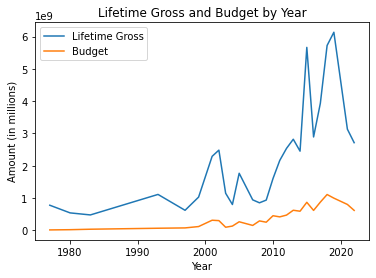

In [34]:
data = df_movieid[['Year','Lifetime Gross', 'Budget']]
data = data.groupby('Year').sum()
plt.plot(data.index, data['Lifetime Gross'], label='Lifetime Gross')
plt.plot(data.index, data['Budget'], label='Budget')
plt.title('Lifetime Gross and Budget by Year')
plt.xlabel('Year')
plt.ylabel('Amount (in millions)')
plt.legend()
plt.show(ata

## Show the studios' revenue by chart:

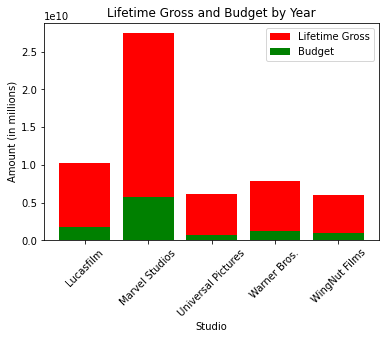

In [38]:
data_stu = df_movieid[['Studio', 'Lifetime Gross', 'Budget']]
data_stu = data_stu.groupby('Studio').sum()
plt.bar(data_stu.index, data_stu['Lifetime Gross'], label='Lifetime Gross', color = 'r')
plt.bar(data_stu.index, data_stu['Budget'], label='Budget', color = 'g')
plt.xticks(rotation = 45)
plt.title('Lifetime Gross and Budget by Year')
plt.xlabel('Studio')
plt.ylabel('Amount (in millions)')
plt.legend()
plt.show();

## Show the number of franchises by chart:

In [60]:
data_fra = df_movieid.merge(df_franchiseid, on ='FranchiseID', how = 'inner',right_index = False)
data_fra = data_fra[['MovieID','Title', 'Studio', 'FranchiseName', 'Lifetime Gross','Budget']]
data_fra.head()

,MovieID,Title,Studio,FranchiseName,Lifetime Gross,Budget
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,775398007,11000000.0
1,1002,Star Wars: Episode V - The Empire Strikes Back,Lucasfilm,Star Wars,538375067,18000000.0
2,1003,Star Wars: Episode VI - Return of the Jedi,Lucasfilm,Star Wars,475106177,32500000.0
3,1006,Star Wars: Episode I - The Phantom Menace,Lucasfilm,Star Wars,1027082707,115000000.0
4,1010,Star Wars: Episode II - Attack of the Clones,Lucasfilm,Star Wars,653779970,120000000.0


In [59]:
fig = px.pie(data_fra, names = 'FranchiseName', values = np.ones(60), title = 'Franchise Number', color_discrete_sequence=px.colors.sequential.Jet)
fig.show()

## Show the best franchise by chart:

In [68]:
data_fra['Profit'] = data_fra['Lifetime Gross'] - data_fra['Budget']
data_pro = data_fra.groupby('FranchiseName')['Profit'].sum()
data_pro.sort_values(ascending = False)

FranchiseName
MCU                2.171064e+10
Star Wars          8.483609e+09
Wizarding World    6.512725e+09
Jurassic Park      5.363008e+09
Middle Earth       4.914687e+09
Name: Profit, dtype: float64

In [74]:
fig = px.bar(data_fra, x = 'FranchiseName', y = 'Profit')
fig.show()

## Show the best director:

In [76]:
data_dir = data_fra.merge(df_directorid, on ='MovieID', how = 'inner', right_index = False)
data_dir.head()

,MovieID,Title,Studio,FranchiseName,Lifetime Gross,Budget,Profit,index,MovieDirectorID,DirectorName
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,775398007,11000000.0,764398007.0,352,101,George Lucas
1,1002,Star Wars: Episode V - The Empire Strikes Back,Lucasfilm,Star Wars,538375067,18000000.0,520375067.0,353,102,Irvin Kershner
2,1003,Star Wars: Episode VI - Return of the Jedi,Lucasfilm,Star Wars,475106177,32500000.0,442606177.0,354,103,Richard Marquand
3,1006,Star Wars: Episode I - The Phantom Menace,Lucasfilm,Star Wars,1027082707,115000000.0,912082707.0,357,106,George Lucas
4,1010,Star Wars: Episode II - Attack of the Clones,Lucasfilm,Star Wars,653779970,120000000.0,533779970.0,361,110,George Lucas


In [77]:
data_pro_dir = data_dir.groupby('DirectorName')['Profit'].sum().nlargest(10)
data_pro_dir

DirectorName
Anthony Russo      5.593620e+09
Joe Russo          5.593620e+09
Peter Jackson      4.914687e+09
David Yates        3.421115e+09
Jon Watts          3.392973e+09
George Lucas       2.965651e+09
J. J. Abrams       2.562671e+09
Joss Whedon        2.421625e+09
Colin Trevorrow    2.354320e+09
Chris Columbus     1.677219e+09
Name: Profit, dtype: float64

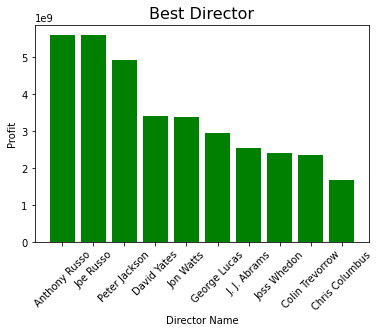

In [80]:
directors = []
for dirname, pro in data_pro_dir.items():
    directors.append(dirname)

plt.bar(directors, data_pro_dir, color = 'g')
plt.title('Best Director', fontsize = 16)
plt.xticks(rotation = 45)
plt.xlabel('Director Name')
plt.ylabel('Profit')
plt.show();

## Show the most popular group of actors:

In [89]:
data_act = data_fra.merge(df_castid, on ='MovieID', how = 'inner', right_index = False)
data_act['All Actors'] = data_act.groupby('MovieID')['ActorName'].transform(','.join)
data_act.head()

,MovieID,Title,Studio,FranchiseName,Lifetime Gross,Budget,Profit,index,MovieCastID,ActorName,All Actors
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,775398007,11000000.0,764398007.0,61,1001,Mark Hamill,"Mark Hamill,Harrison Ford,Carrie Fisher,Peter ..."
1,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,775398007,11000000.0,764398007.0,62,1002,Harrison Ford,"Mark Hamill,Harrison Ford,Carrie Fisher,Peter ..."
2,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,775398007,11000000.0,764398007.0,63,1003,Carrie Fisher,"Mark Hamill,Harrison Ford,Carrie Fisher,Peter ..."
3,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,775398007,11000000.0,764398007.0,64,1004,Peter Cushing,"Mark Hamill,Harrison Ford,Carrie Fisher,Peter ..."
4,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,775398007,11000000.0,764398007.0,65,1005,Alec Guinness,"Mark Hamill,Harrison Ford,Carrie Fisher,Peter ..."


In [92]:
data_act = data_act[['MovieID', 'All Actors']].drop_duplicates()
data_act.head()

,MovieID,All Actors
0,1001,"Mark Hamill,Harrison Ford,Carrie Fisher,Peter ..."
5,1002,"Mark Hamill,Harrison Ford,Carrie Fisher,Billy ..."
10,1003,"Mark Hamill,Harrison Ford,Carrie Fisher,Billy ..."
15,1006,"Liam Neeson,Ewan McGregor,Natalie Portman,Jake..."
20,1010,"Hayden Christensen,Ewan McGregor,Natalie Portm..."


In [93]:
data_act['All Actors'].value_counts().head(10)

Mark Hamill,Harrison Ford,Carrie Fisher,Billy Deel Williams,Anthony Daniels         2
Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth,Scarlett Johansson       2
Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Chris Evans,Scarlett Johansson       2
Chris Evans,Robert Downey Jr. ,Scarlett Johansson,Sebastian Stan,Anthony Mackie     1
Robert Downey Jr.,Terrence Howard,Jeff Bridges,Gwyneth Paltrow                      1
Edward Norton,Liv Tyler,Tim Roth,William Hurt                                       1
Robert Downey Jr.,Gwyneth Paltrow,Don Cheadle,Scarlett Johansson,Sam Rockwell       1
Chris Hemsworth,Natalie Portman,Tom Hiddleston,Anthony Hopkins,Stellan Skarsgård    1
Chris Evans,Tommy Lee Jones,Hugo Weaving,Hayley Atwell,Sebastian Stan               1
Robert Downey Jr.,Gwyneth Paltrow,Don Cheadle,Guy Pearce,Rebecca Hall               1
Name: All Actors, dtype: int64

## Show the best actor

In [96]:
data_act_2 = data_fra.merge(df_castid, on ='MovieID', how = 'inner', right_index = False)
data_pro_act = data_act_2.groupby('ActorName')['Profit'].sum().nlargest(10)
data_pro_act

ActorName
Chris Hemsworth       8.524241e+09
Robert Downey Jr.     8.452027e+09
Chris Evans           8.245815e+09
Scarlett Johansson    8.074509e+09
Mark Ruffalo          6.567486e+09
Daniel Radcliffe      6.512725e+09
Emma Watson           6.512725e+09
Rupert Grint          6.512725e+09
Carrie Fisher         5.305749e+09
Mark Hamill           5.305749e+09
Name: Profit, dtype: float64

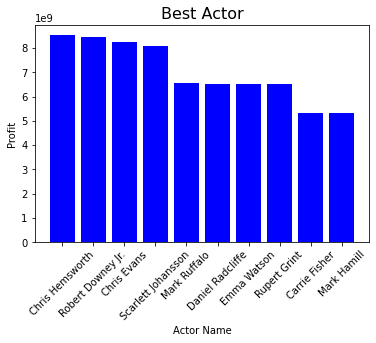

In [97]:
actors = []
for actname, prof in data_pro_act.items():
    actors.append(actname)

plt.bar(actors, data_pro_act, color = 'b')
plt.title('Best Actor', fontsize = 16)
plt.xticks(rotation = 45)
plt.xlabel('Actor Name')
plt.ylabel('Profit')
plt.show();

# SIUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU !!!!